In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [71]:
# customer churn dataset
df = pd.read_csv(r'C:\Users\vidha\Desktop\IISc\CP218 - Theory and applications of bayesian learning\Project2\Datasets\Iranian-Churn-Dataset-Data-Set\Customer Churn.csv')
print(df)

      Call Failure  Complains  Subscription Length  Charge Amount  \
0                8          0                   38              0   
1                0          0                   39              0   
2               10          0                   37              0   
3               10          0                   38              0   
4                3          0                   38              0   
...            ...        ...                  ...            ...   
3145            21          0                   19              2   
3146            17          0                   17              1   
3147            13          0                   18              4   
3148             7          0                   11              2   
3149             8          1                   11              2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5             

In [72]:
# customer churn datset
df.corr()['Churn']

Call Failure              -0.008987
Complains                  0.532053
Subscription Length       -0.032588
Charge Amount             -0.202305
Seconds of Use            -0.298935
Frequency of use          -0.303337
Frequency of SMS          -0.220754
Distinct Called Numbers   -0.278867
Age Group                 -0.014550
Tariff Plan               -0.105853
Status                     0.498976
Age                       -0.017705
Customer Value            -0.289144
Churn                      1.000000
Name: Churn, dtype: float64

In [84]:
# customer churn dataset
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value','Churn']]

In [85]:
df_selected.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,1,197.640,0
1,0,0,39,0,318,5,7,4,2,46.035,0
2,10,0,37,0,2453,60,359,24,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,145.805,0


In [86]:
print("correlation of features with output :")
print(df_selected.corr()['Churn'])
columns = list(df_selected.columns)
corr_list = list(abs(df_selected.corr()['Churn']))[0:-1]
array_selected = df_selected.values
input_idx = [i for i in range(len(columns) - 1)]
output_idx = [input_idx[-1] + 1]

correlation of features with output :
Call Failure              -0.008987
Complains                  0.532053
Subscription Length       -0.032588
Charge Amount             -0.202305
Seconds of Use            -0.298935
Frequency of use          -0.303337
Frequency of SMS          -0.220754
Distinct Called Numbers   -0.278867
Status                     0.498976
Customer Value            -0.289144
Churn                      1.000000
Name: Churn, dtype: float64


In [87]:
X = array_selected[:,input_idx]
y = array_selected[:,output_idx].astype('int')

In [88]:
def choose_features(num_of_features_choosen):
    temp1 = list(np.argsort(corr_list)[::-1][:num_best_features])
    temp2 = [input_idx[val] for val in temp1]
    choosen_features = [columns[val] for val in temp2]
    return choosen_features

In [89]:
# MAX_DEGREE = 5
# num_best_features_list = [i for i in range(1,len(columns))]
# n_list = [i for i in range(1,MAX_DEGREE + 1)] # degree list
# for num_best_features in num_best_features_list:
#     choosen_features = choose_features(num_best_features)
#     print("\nchoosen features :\n",choosen_features)
#     input_features = np.array(df_selected[choosen_features]).reshape(-1,len(choosen_features))
#     output_features = np.array(df_selected[['Churn']]).reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size = 0.25)

#     scaler = MinMaxScaler()
#     # transform data
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.fit_transform(X_test)
#     y_train_scaled = scaler.fit_transform(y_train)
#     y_test_scaled = scaler.fit_transform(y_test)
#     for n in n_list:
#         # frequentist classification
#         poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
#         X_train_scaled_poly = poly.fit_transform(X_train_scaled)
#         X_test_scaled_poly = poly.fit_transform(X_test_scaled)
        
#         logisticRegrPoly = LogisticRegression()
#         logisticRegrPoly.fit(X_train_scaled_poly, y_train_scaled.flatten())
        
# #         print(f"coeff for degree = {n} is {linearRegrPoly.coef_}")
# #         print(f"intercept for degree = {n} is {linearRegrPoly.intercept_}")
        
#         score = logisticRegrPoly.score(X_test_scaled_poly, y_test_scaled.flatten())
#         print(f"accuracy with degree = {n} is {score}")

using pca

In [90]:
n = 1
num_best_features = 10
choosen_features = choose_features(num_best_features)
print("\nchoosen features :\n",choosen_features)
input_features = np.array(df_selected[choosen_features]).reshape(-1,len(choosen_features))
output_features = np.array(df_selected[['Churn']]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size = 0.25)
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)


choosen features :
 ['Complains', 'Status', 'Frequency of use', 'Seconds of Use', 'Customer Value', 'Distinct Called Numbers', 'Frequency of SMS', 'Charge Amount', 'Subscription Length', 'Call Failure']


[0.45, 0.17, 0.13, 0.1, 0.05, 0.04, 0.02, 0.02, 0.0, 0.0]


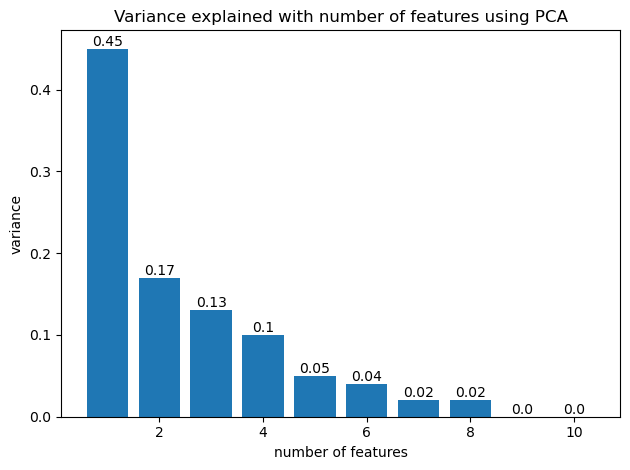

In [91]:
pca = PCA()
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance=[round(elem,2) for elem in explained_variance]
print(explained_variance)
x_bar = [i for i in range(1,len(explained_variance)+1)]
fig = plt.bar(x =x_bar, height=explained_variance)
plt.bar_label(labels=explained_variance,container=fig)

plt.title('Variance explained with number of features using PCA')
plt.xlabel("number of features")
plt.ylabel("variance")
plt.tight_layout()
plt.savefig("plots/variance_explained_pca_logistic.jpg",dpi=150)

In [92]:
# pca = PCA(n_components=10)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

accuracy with degree = 1 is 0.8895939086294417
sensitivity with degree = 1 is 0.40310077519379844
F Score with degree = 1 is 0.5445026178010471
accuracy with degree = 2 is 0.9035532994923858
sensitivity with degree = 2 is 0.43410852713178294
F Score with degree = 2 is 0.5957446808510639
accuracy with degree = 3 is 0.9060913705583756
sensitivity with degree = 3 is 0.4496124031007752
F Score with degree = 3 is 0.6105263157894736
accuracy with degree = 4 is 0.9060913705583756
sensitivity with degree = 4 is 0.4573643410852713
F Score with degree = 4 is 0.6145833333333333
accuracy with degree = 5 is 0.9073604060913706
sensitivity with degree = 5 is 0.46511627906976744
F Score with degree = 5 is 0.6217616580310881


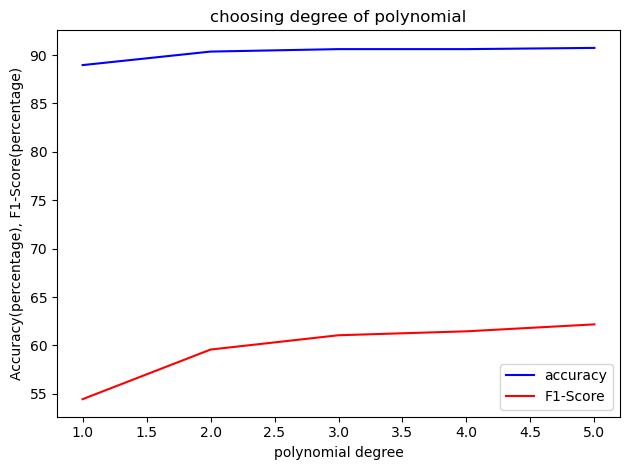

In [93]:
MAX_DEGREE = 5
n_list = [i for i in range(1,MAX_DEGREE + 1)] # degree list
classification_score = []
sensitivity_score = []
F_score = []
for n in n_list:
    # frequentist classification
    poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
    X_train_scaled_poly = poly.fit_transform(X_train_scaled)
    X_test_scaled_poly = poly.fit_transform(X_test_scaled)

    logisticRegrPoly = LogisticRegression()
    logisticRegrPoly.fit(X_train_scaled_poly, y_train_scaled.flatten())

    score = logisticRegrPoly.score(X_test_scaled_poly, y_test_scaled.flatten())
    y_pred_scaled = logisticRegrPoly.predict(X_test_scaled_poly)
    confusion = confusion_matrix(y_test_scaled,y_pred_scaled)
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    fscore = f1_score(y_test_scaled,y_pred_scaled)
    print(f"accuracy with degree = {n} is {score}")
    print(f"sensitivity with degree = {n} is {sensitivity}")
    print(f"F Score with degree = {n} is {fscore}")
#     print(logisticRegrPoly.coef_)
    classification_score.append(score*100)
    sensitivity_score.append(sensitivity*100)
    F_score.append(fscore*100)
    

x = [i for i in range(1,len(classification_score)+1)]
plt.plot(x,classification_score,'b-')
plt.plot(x,F_score,'r-')
plt.xlabel("polynomial degree")
plt.ylabel(r"Accuracy(percentage), F1-Score(percentage)")

plt.title('choosing degree of polynomial')
plt.legend(['accuracy','F1-Score'])
plt.tight_layout()
plt.savefig("plots/polynomial_degree_pca_logistic.jpg",dpi=150)

plt.show()

Bayesian Ridge

accuracy with degree = 1 is 0.8984771573604061
sensitivity with degree = 1 is 0.4186046511627907
F Score with degree = 1 is 0.574468085106383
accuracy with degree = 2 is 0.9124365482233503
sensitivity with degree = 2 is 0.5193798449612403
F Score with degree = 2 is 0.6600985221674878
accuracy with degree = 3 is 0.9517766497461929
sensitivity with degree = 3 is 0.7906976744186046
F Score with degree = 3 is 0.8429752066115702
accuracy with degree = 4 is 0.950507614213198
sensitivity with degree = 4 is 0.7829457364341085
F Score with degree = 4 is 0.8381742738589212
accuracy with degree = 5 is 0.950507614213198
sensitivity with degree = 5 is 0.7829457364341085
F Score with degree = 5 is 0.8381742738589212


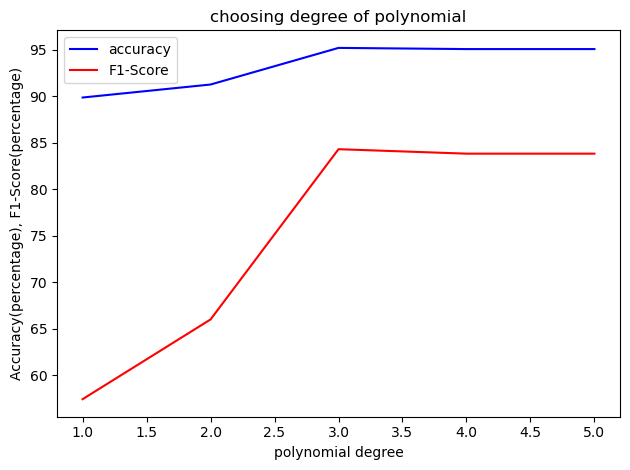

In [94]:
MAX_DEGREE = 5
n_list = [i for i in range(1,MAX_DEGREE + 1)] # degree list
classification_score = []
sensitivity_score = []
F_score = []
for n in n_list:
    
    # bayesian ridge classification
    poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
    X_train_scaled_poly = poly.fit_transform(X_train_scaled)
    X_test_scaled_poly = poly.fit_transform(X_test_scaled)

    clf = linear_model.BayesianRidge()
    clf.fit(X_train_scaled_poly, y_train_scaled.flatten())
#     print(clf.coef_)
    
    predictions = []
    for elem in clf.predict(X_test_scaled_poly):
        if(elem<0.5):
            predictions.append(0)
        else:
            predictions.append(1)

    y_pred_scaled = np.array(predictions).reshape(-1,1)
    
    correct = 0
    for i in range(len(predictions)):
        if(predictions[i]==list(y_test_scaled.flatten())[i]):
            correct = correct + 1

    score = correct/len(predictions)

    confusion = confusion_matrix(y_test_scaled,y_pred_scaled)
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    fscore = f1_score(y_test_scaled,y_pred_scaled)
    print(f"accuracy with degree = {n} is {score}")
    print(f"sensitivity with degree = {n} is {sensitivity}")
    print(f"F Score with degree = {n} is {fscore}")
    classification_score.append(score*100)
    sensitivity_score.append(sensitivity*100)
    F_score.append(fscore*100)

x = [i for i in range(1,len(classification_score)+1)]
plt.plot(x,classification_score,'b-')
plt.plot(x,F_score,'r-')
plt.xlabel("polynomial degree")
plt.ylabel(r"Accuracy(percentage), F1-Score(percentage)")

plt.title('choosing degree of polynomial')
plt.legend(['accuracy','F1-Score'])
plt.tight_layout()
plt.savefig("plots/polynomial_degree_pca_logistic_bayesian_ridge.jpg",dpi=150)

plt.show()